In [ ]:
#DataEngg- 18/06/2024
#Dealing with Missing Values
#Dealing with outliers
#Converting into categorical or numerical
#Dealing with Imbalance
#Feature selection
#Dimentionality Reduction

In [ ]:
import pandas as pd
df=pd.read_csv("Iris.csv")
X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(X)
print(Y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [ ]:
# Feature Selection 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

           Specs       Score
0  SepalLengthCm   10.817821
1   SepalWidthCm    3.594499
2  PetalLengthCm  116.169847
3   PetalWidthCm   67.244828


[0.09606316 0.05882939 0.38854664 0.45656082]


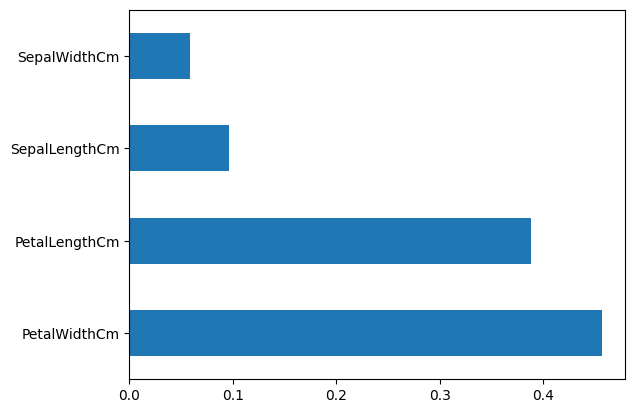

In [ ]:
#Feature Selection 2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

In [5]:
#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder
'''
df['SepalLengthCm'] = pd.cut(df['SepalLengthCm'], 3, labels=['0', '1', '2']).astype(str)
df['SepalWidthCm'] = pd.cut(df['SepalWidthCm'], 3, labels=['0', '1', '2']).astype(str)
df['PetalLengthCm'] = pd.cut(df['PetalLengthCm'], 3, labels=['0', '1', '2']).astype(str)
df['PetalWidthCm'] = pd.cut(df['PetalWidthCm'], 3, labels=['0', '1', '2']).astype(str)

print(df)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(Y)
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)
'''

"\ndf['SepalLengthCm'] = pd.cut(df['SepalLengthCm'], 3, labels=['0', '1', '2']).astype(str)\ndf['SepalWidthCm'] = pd.cut(df['SepalWidthCm'], 3, labels=['0', '1', '2']).astype(str)\ndf['PetalLengthCm'] = pd.cut(df['PetalLengthCm'], 3, labels=['0', '1', '2']).astype(str)\ndf['PetalWidthCm'] = pd.cut(df['PetalWidthCm'], 3, labels=['0', '1', '2']).astype(str)\n\nprint(df)\n\nX = df.drop('Id', axis=1)\nX = X.drop('Species', axis=1)\nY = df['Species']\nprint(Y)\nle = LabelEncoder()\nle.fit(Y)\nY = le.transform(Y)\nprint(Y)\n"

In [ ]:
#Categorical to Numerical
'''
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
'''

'\nle=LabelEncoder()\nle.fit(Y)\nY = le.transform(Y)\n'

In [ ]:
#Dealing with missing values
'''
1. Use Drop (df.drop())
2. use Replace (df.replace("back","DOS"))
3. Fill NA ()

print(df.isnull().sum())
df['Item_Weight'].fillna((df['Item_Weight'].mean()/.median()/.mode()), inplace=True) #Imputing Neurimical Values

df['Outlet_Size'].fillna(('Medium'), inplace=True)  #Imputing Categorical Values
'''

'\n1. Use Drop (df.drop())\n2. use Replace (df.replace("back","DOS"))\n3. Fill NA ()\n\nprint(df.isnull().sum())\ndf[\'Item_Weight\'].fillna((df[\'Item_Weight\'].mean()/.median()/.mode()), inplace=True) #Imputing Neurimical Values\n\ndf[\'Outlet_Size\'].fillna((\'Medium\'), inplace=True)  #Imputing Categorical Values\n'

Counter({0: 50, 1: 50, 2: 50})
Counter({0: 50, 1: 50, 2: 50})


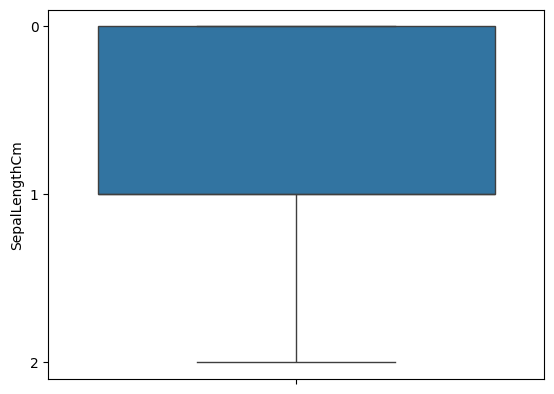

In [ ]:
#Oversampling and Under Sampling

#a = (df['Species'] == 'Iris-setosa').sum()
#print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))


from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)


#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])
plt.show()

In [ ]:
#Dealing with Outliers using Interquantile Range

#Dealing with Outliers using Interquantile Range

# Convert 'SepalLengthCm' back to numeric if needed
df['SepalLengthCm'] = df['SepalLengthCm'].astype(float) #If the column is of type 'category' change to float

print(df['SepalLengthCm'])
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['SepalLengthCm'] < lower].values
out2=df[df['SepalLengthCm'] > upper].values

df['SepalLengthCm'].replace(out1,lower,inplace=True)
df['SepalLengthCm'].replace(out2,upper,inplace=True)

print(df['SepalLengthCm'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: SepalLengthCm, Length: 150, dtype: float64
1.0
2.5
-1.5
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: SepalLengthCm, Length: 150, dtype: float64


In [ ]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

[[-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.31321774  1.20402635]
 [-1.31321774  1.20402635]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.31321774  1.20402635]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 